In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1. Неявный метод Эйлера.

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Cate\AppData\Local\Temp\ipykernel_20856\3269194722.py:2: SyntaxWarning: invalid escape sequence '\l'
  """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера."""


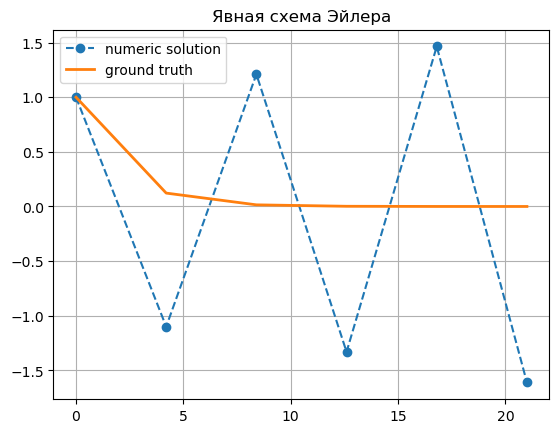

In [2]:
def euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=12/abs(lam), dt=2.1/abs(lam))
plt.title('Явная схема Эйлера')
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

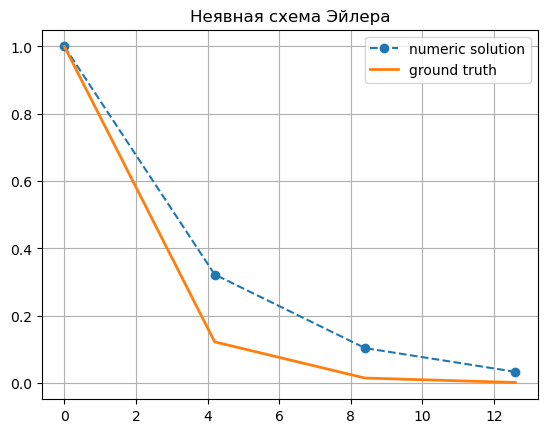

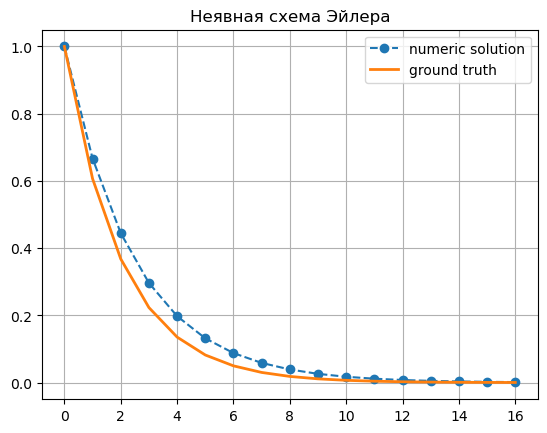

In [3]:
def implicit_euler_solve(lam, u0, T, dt):
    """Решает du/dt = lambda u на 0 < t < T с u(t=0) = u0
    при помощи неявного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k]/(1-dt*lam)
    return tt, y
# Нарисовать графики с разными значениями шага,
# и отдельно при lambda*tau > 2.

plt.title('Неявная схема Эйлера')
lam = -0.5
tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=2.1/abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

lam = -0.5
tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=0.5/abs(lam))
fig = plt.figure()
plt.title('Неявная схема Эйлера')
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

# Для тестирования
lam = -0.5 
tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=2.1/abs(lam))

assert (y > 0).all()

# Задание 2. Сравнение явной схемы Эйлера и матричной экспоненты.

In [4]:
def euler_solve2(a, u0, T, dt):
    """Solve the system du/dt = Au via an explicit Euler scheme.
    
    Parameters
    ----------
    a : ndarray, shape(ndim, ndim)
        The matrix of the l.h.s.
    u0 : ndarray, shape(ndim,)
        Initial condition
    T : float
        construct the solution for $t\in [0, T)$
    dt : float
        Integration step size $\tau$
        
    Returns
    -------
    t : ndarray, shape (n,)
        Integration times
    y : ndarray, shape (n, ndim)
        Solution of the FD system. 
        y[k, :] is the solution at t[k].
    """
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = a.shape[0]
    y = np.empty((num_steps+1, ndim))
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k]+a@y[k]*dt
    return tt,y

from scipy.linalg import expm

def mat_exp_solve(a, u0, tt):
    """Construct the solution of $du/dt = A u$ with $u(t=0) = u_0$ at times `tt`.
    
    Parameters
    ----------
    a : ndarray, shape (ndim, ndim)
    
    u0 : ndarray, shape (ndim,)
    
    tt : ndarray, shape (n,)
        The values of $t$
        
    Return
    ------
    u : ndarray, shape (n, ndim)
        u[:, k] is $\exp(t[k] A)$
    """
    ym = np.empty((tt.shape[0],2))
    for k in range(tt.shape[0]):
        ym[k] = expm(a*tt[k])@u0
    return ym
    


<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:37: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:37: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Cate\AppData\Local\Temp\ipykernel_20856\1750706738.py:2: SyntaxWarning: invalid escape sequence '\i'
  """Solve the system du/dt = Au via an explicit Euler scheme.
C:\Users\Cate\AppData\Local\Temp\ipykernel_20856\1750706738.py:37: SyntaxWarning: invalid escape sequence '\e'
  """Construct the solution of $du/dt = A u$ with $u(t=0) = u_0$ at times `tt`.


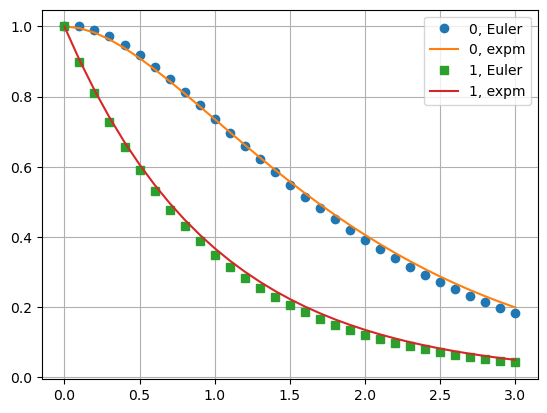

0.06220718588811646
0.07937071356899193


In [5]:
# Solve via Euler's method, compare to the matrix exponential

from scipy.linalg import expm

a = np.array([[-1, 1],
              [0, -1]], dtype=float)
t, y  = euler_solve2(a, u0=[1, 1], T=3, dt=0.1)
ym = mat_exp_solve(a, [1, 1], t)

plt.plot(t, y[:, 0], 'o', label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)
plt.show()
print(np.linalg.norm(y[:,0] - ym[:,0]))
print(np.linalg.norm(y[:,1] - ym[:,1]))

# Задание 3. Проверка жёсткости системы и неявные методы.

In [6]:
a = np.array([[-10,10],[32,-499]])
lam = np.linalg.eigvals(a)
print('Собственные значения:', *lam)
print('s =', lam[1]/lam[0], 'система умеренно жесткая')

Собственные значения: -9.346476672269716 -499.6535233277303
s = 53.45902427704808 система умеренно жесткая


Явный метод Эйлера будет устойчив при $-2<\lambda \tau<0$, то есть при $\tau<4\cdot 10^{-3}$. Следовательно, при обоих шагах может наблюдаться неустойчивость решения.

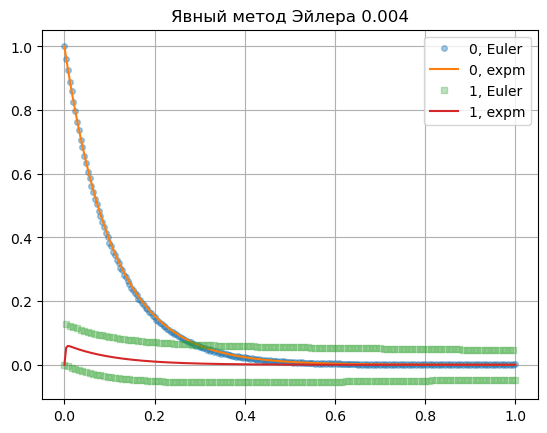

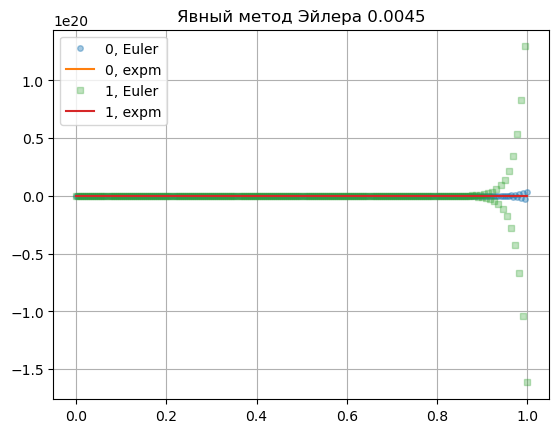

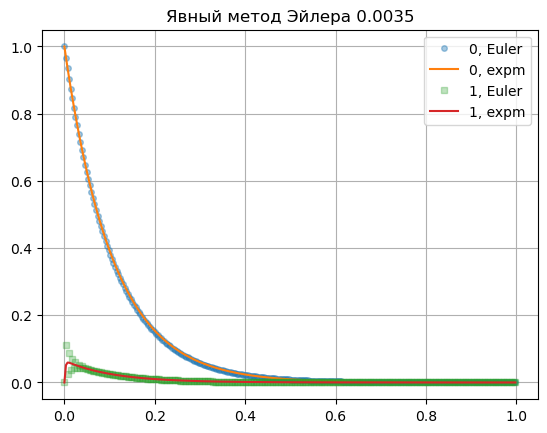

In [7]:
a = np.array([[-10,10],[32,-499]])

tau = 4e-3

t, y  = euler_solve2(a, u0=[1, 0], T=1, dt=tau)
ym = mat_exp_solve(a, [1, 0], t)

plt.title(f'Явный метод Эйлера {tau}')
plt.plot(t, y[:, 0], 'o', markersize = 4, alpha = 0.4, label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', markersize = 4, alpha = 0.3, label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)
plt.show()
############
tau = 4.5e-3

a = np.array([[-10,10],[32,-499]])

t, y  = euler_solve2(a, u0=[1, 0], T=1, dt=tau)
ym = mat_exp_solve(a, [1, 0], t)

plt.title(f'Явный метод Эйлера {tau}')
plt.plot(t, y[:, 0], 'o', markersize = 4, alpha = 0.4, label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', markersize = 4, alpha = 0.3, label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)
plt.show()
##########
tau = 3.5e-3

a = np.array([[-10,10],[32,-499]])

t, y  = euler_solve2(a, u0=[1, 0], T=1, dt=tau)
ym = mat_exp_solve(a, [1, 0], t)

plt.title(f'Явный метод Эйлера {tau}')
plt.plot(t, y[:, 0], 'o', markersize = 4, alpha = 0.4, label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', markersize = 4, alpha = 0.3, label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)
plt.show()


In [8]:
def implicit_euler_solve2(a, u0, T, dt):
    """Solve the system du/dt = Au via an explicit Euler scheme.
    
    Parameters
    ----------
    a : ndarray, shape(ndim, ndim)
        The matrix of the l.h.s.
    u0 : ndarray, shape(ndim,)
        Initial condition
    T : float
        construct the solution for $t\in [0, T)$
    dt : float
        Integration step size $\tau$
        
    Returns
    -------
    t : ndarray, shape (n,)
        Integration times
    y : ndarray, shape (n, ndim)
        Solution of the FD system. 
        y[k, :] is the solution at t[k].
    """
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = a.shape[0]
    y = np.empty((num_steps+1, ndim))
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = np.linalg.solve(np.eye(ndim)-dt*a,y[k])
    return tt,y

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Cate\AppData\Local\Temp\ipykernel_20856\985976106.py:2: SyntaxWarning: invalid escape sequence '\i'
  """Solve the system du/dt = Au via an explicit Euler scheme.


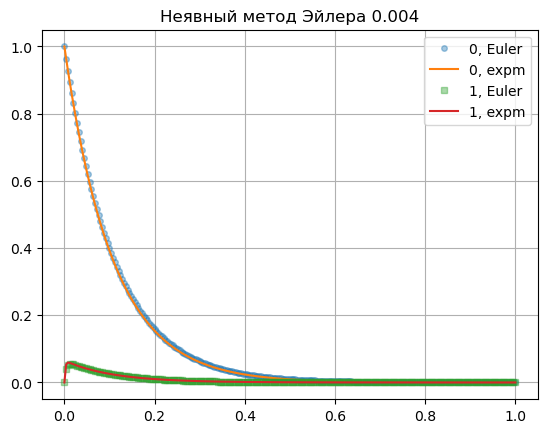

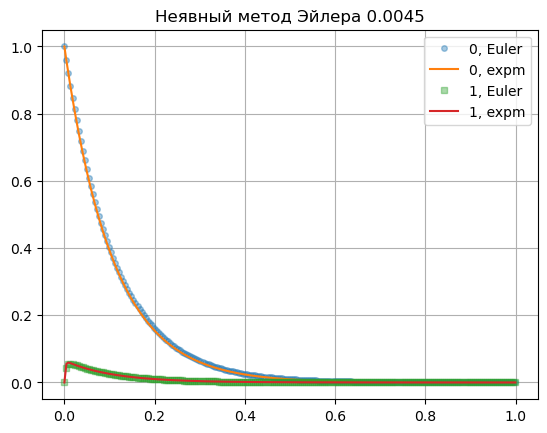

In [9]:
a = np.array([[-10,10],[32,-499]])

tau = 4e-3

t, y  = implicit_euler_solve2(a, u0=[1, 0], T=1, dt=tau)
ym = mat_exp_solve(a, [1, 0], t)

plt.title(f'Неявный метод Эйлера {tau}')
plt.plot(t, y[:, 0], 'o', markersize = 4, alpha = 0.4, label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', markersize = 4, alpha = 0.4, label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)
plt.show()
############
tau = 4.5e-3

a = np.array([[-10,10],[32,-499]])

t, y  = implicit_euler_solve2(a, u0=[1, 0], T=1, dt=tau)
ym = mat_exp_solve(a, [1, 0], t)

plt.title(f'Неявный метод Эйлера {tau}')
plt.plot(t, y[:, 0], 'o', markersize = 4, alpha = 0.4, label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', markersize = 4, alpha = 0.4, label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)
plt.show()


# Задание 6. Законы сохранения и решение ОДУ.

Система уравнений:
\begin{cases}
u' = v\\
v' = -\omega^2 u
\end{cases}

Матрица линейной системы: 

\begin{pmatrix}
0 & 1\\
-\omega^2 & 0
\end{pmatrix}

Собственные значения матрицы равны $\pm i\omega$, поэтому явный метод Эйлера будет неустойчив при любом шаге.

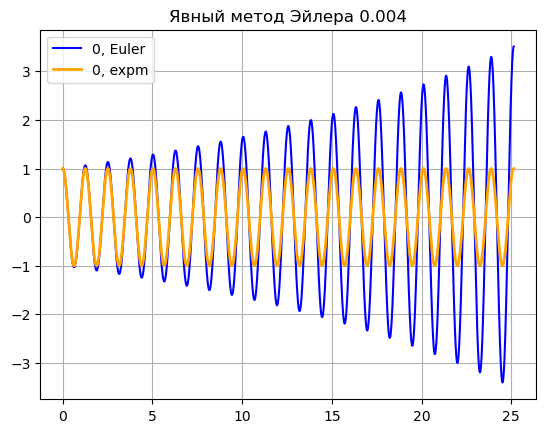

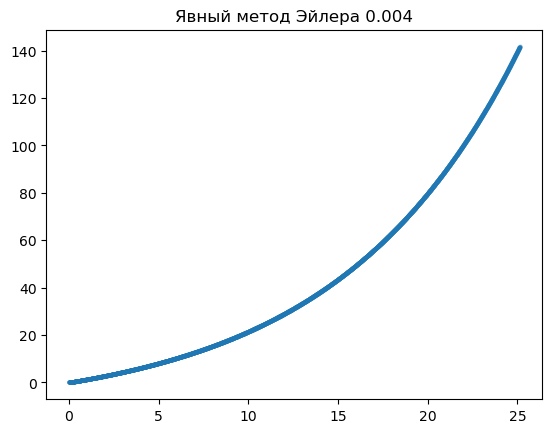

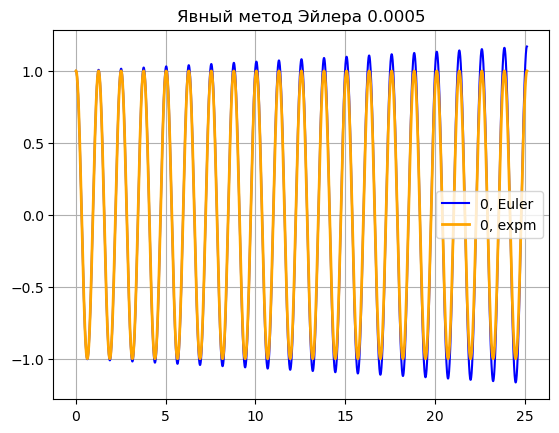

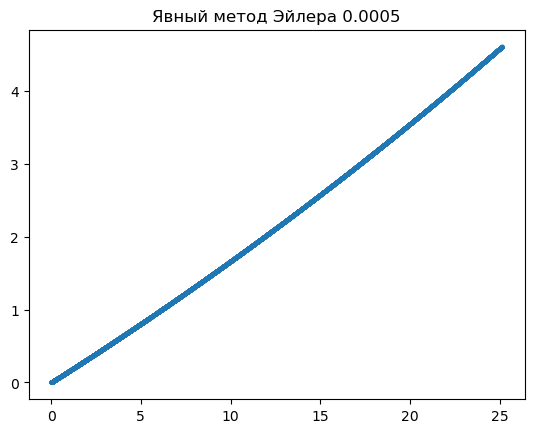

In [10]:
tau = 4e-3
w = 5
T = 20*2*np.pi/w

a = np.array([[0,1],[-w**2,0]])

t, y  = euler_solve2(a, u0=[1, 0], T = T, dt=tau)
ym = mat_exp_solve(a, [1, 0], t)
plt.title(f'Явный метод Эйлера {tau}')
plt.plot(t, y[:, 0], '-', label='0, Euler',color = 'blue')
plt.plot(t, ym[:, 0], '-',alpha = 1, label='0, expm',color = 'orange',lw = 2)

# plt.plot(t, y[:, 1], 's', markersize = 4, alpha = 0.4, label='1, Euler')
# plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)
plt.show()

E = 0.5*y[:,1]**2 + 0.5*w**2*y[:,0]**2
Em = 0.5*ym[:,1]**2 + 0.5*w**2*ym[:,0]**2

plt.title(f'Явный метод Эйлера {tau}')
plt.plot(t, E-Em, 'o', markersize = 2, alpha = 0.3, label='0, Euler')
# plt.plot(t, Em, '-', label='0, expm')
plt.show()

###############
tau = 5e-4
w = 5
T = 20*2*np.pi/w

a = np.array([[0,1],[-w**2,0]])

t, y  = euler_solve2(a, u0=[1, 0], T = T, dt=tau)
ym = mat_exp_solve(a, [1, 0], t)

plt.title(f'Явный метод Эйлера {tau}')
plt.plot(t, y[:, 0], '-', label='0, Euler',color = 'blue')
plt.plot(t, ym[:, 0], '-', alpha = 1, label='0, expm',color = 'orange',lw = 2)

# plt.plot(t, y[:, 1], 's', markersize = 4, alpha = 0.4, label='1, Euler')
# plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)
plt.show()

E = 0.5*y[:,1]**2 + 0.5*w**2*y[:,0]**2
Em = 0.5*ym[:,1]**2 + 0.5*w**2*ym[:,0]**2

plt.title(f'Явный метод Эйлера {tau}')
plt.plot(t, E-Em, 'o', markersize = 2, alpha = 0.3, label='0, Euler')
# plt.plot(t, Em, '-', label='0, expm')
plt.show()

In [11]:
# метод Эйлера с пересчетом (Рунге-Кутта 2-ого порядка)

def second_order_runge_kutta2(a, u0, T, dt):
    """Solve the system du/dt = Au via an explicit Euler scheme.
    
    Parameters
    ----------
    a : ndarray, shape(ndim, ndim)
        The matrix of the l.h.s.
    u0 : ndarray, shape(ndim,)
        Initial condition
    T : float
        construct the solution for $t\in [0, T)$
    dt : float
        Integration step size $\tau$
        
    Returns
    -------
    t : ndarray, shape (n,)
        Integration times
    y : ndarray, shape (n, ndim)
        Solution of the FD system. 
        y[k, :] is the solution at t[k].
    """
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = a.shape[0]
    y = np.empty((num_steps+1, ndim))
    y[0] = u0
    for k in range(num_steps):
        f1 = a@y[k]
        f2 = a@(y[k]+dt*f1)
        y[k+1] = y[k]+dt/2*(f1+f2)
    return tt,y

<>:4: SyntaxWarning: invalid escape sequence '\i'
<>:4: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Cate\AppData\Local\Temp\ipykernel_20856\1221089159.py:4: SyntaxWarning: invalid escape sequence '\i'
  """Solve the system du/dt = Au via an explicit Euler scheme.


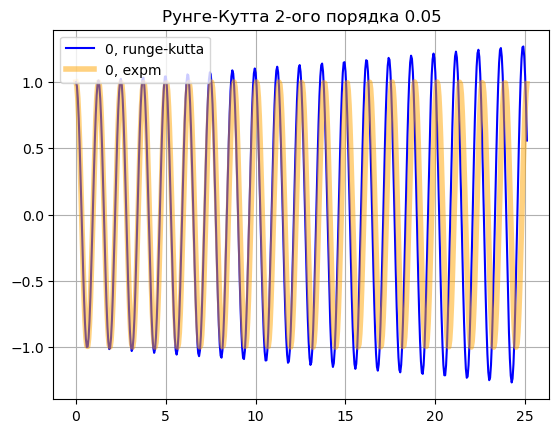

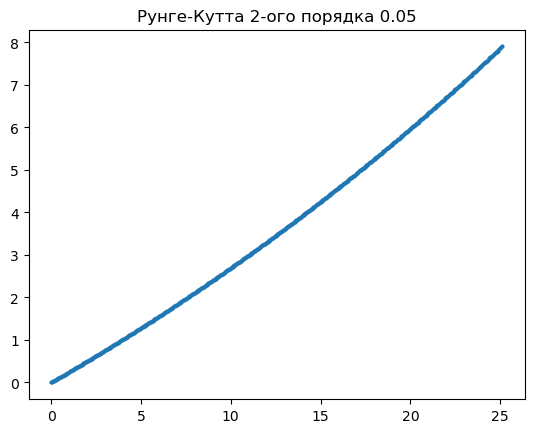

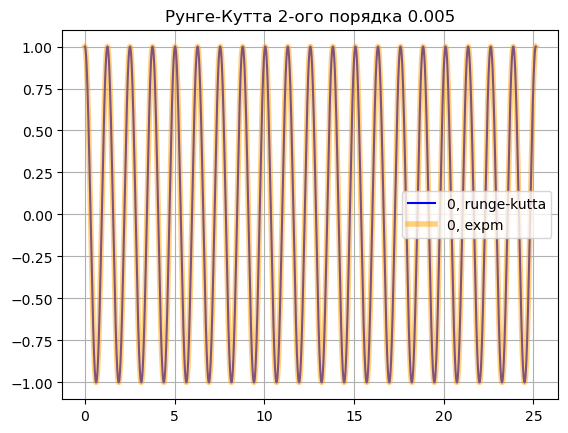

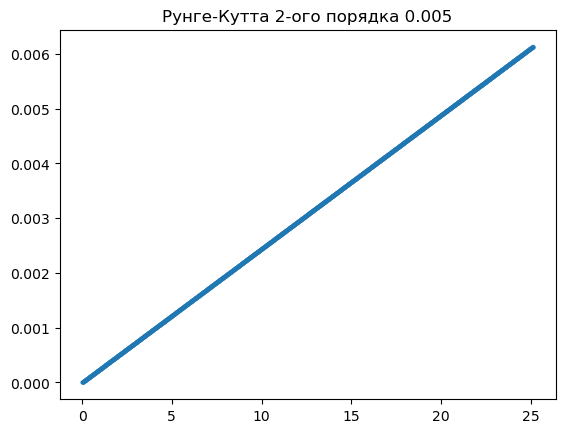

In [12]:
tau = 5e-2
w = 5
T = 20*2*np.pi/w
u0 = [1,0]

a = np.array([[0,1],[-w**2,0]])

t, y  = second_order_runge_kutta2(a, u0=[1, 0], T = T, dt=tau)
ym = mat_exp_solve(a, [1, 0], t)
plt.title(f'Рунге-Кутта 2-ого порядка {tau}')

plt.plot(t, y[:, 0], '-', label='0, runge-kutta',color = 'blue')
plt.plot(t, ym[:, 0], '-', alpha = 0.5, label='0, expm', lw = 4,color = 'orange')


# plt.plot(t, y[:, 1], 's', markersize = 4, alpha = 0.4, label='1, Euler')
# plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)
plt.show()

E = 0.5*y[:,1]**2 + 0.5*w**2*y[:,0]**2
Em = w**2*u0[0]**2/2+u0[1]**2/2

plt.title(f'Рунге-Кутта 2-ого порядка {tau}')
plt.plot(t, E-Em, 'o', markersize = 2, alpha = 1, label='0, Euler')
# plt.plot(t, Em, '-', label='0, expm')
plt.show()

###############
tau = 5e-3
w = 5
T = 20*2*np.pi/w

a = np.array([[0,1],[-w**2,0]])

t, y  = second_order_runge_kutta2(a, u0=[1, 0], T = T, dt=tau)
ym = mat_exp_solve(a, [1, 0], t)

plt.title(f'Рунге-Кутта 2-ого порядка {tau}')

plt.plot(t, y[:, 0], '-', label='0, runge-kutta',color = 'blue')
plt.plot(t, ym[:, 0], '-', alpha = 0.5, label='0, expm', lw = 4,color = 'orange')


# plt.plot(t, y[:, 1], 's', markersize = 4, alpha = 0.4, label='1, Euler')
# plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)
plt.show()


E = 0.5*y[:,1]**2 + 0.5*w**2*y[:,0]**2
E0 = w**2*u0[0]**2/2+u0[1]**2/2

plt.title(f'Рунге-Кутта 2-ого порядка {tau}')
plt.plot(t, E-Em, 'o',markersize = 2, alpha = 0.3, label='0, runge-kutta')
# plt.plot(t, Em, '-', label='0, expm')
plt.show()

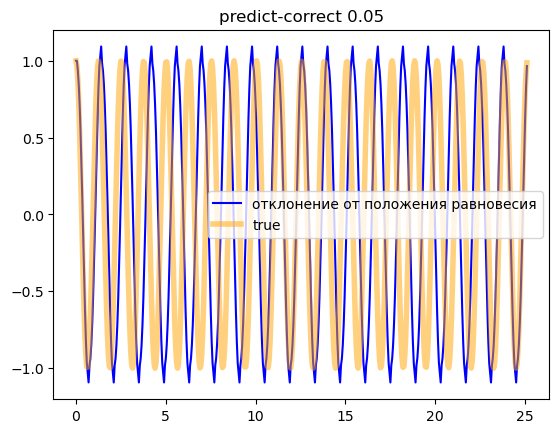

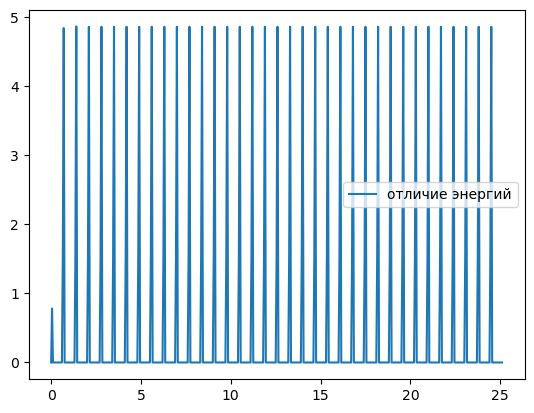

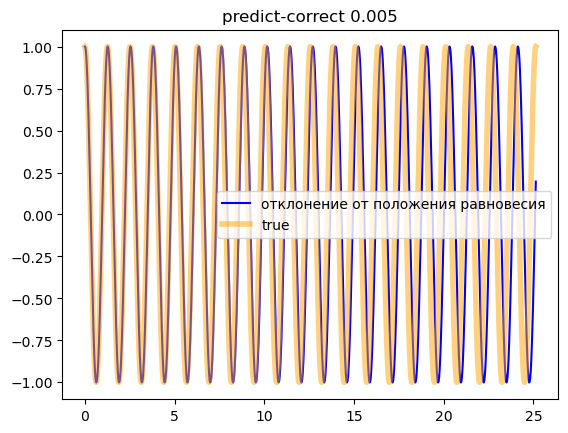

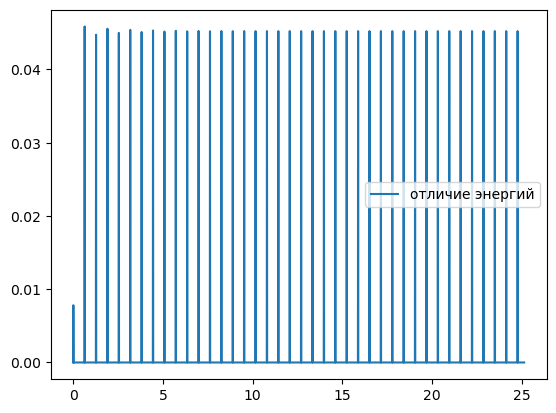

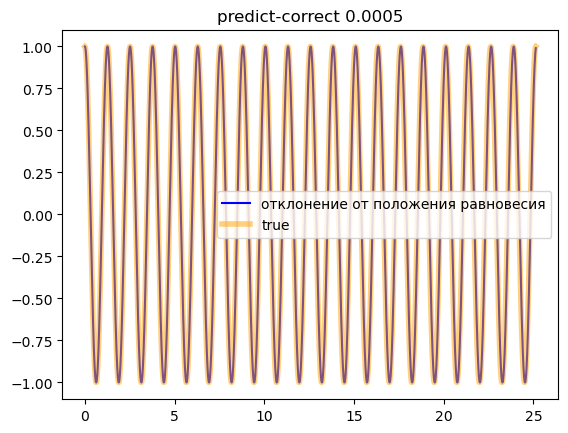

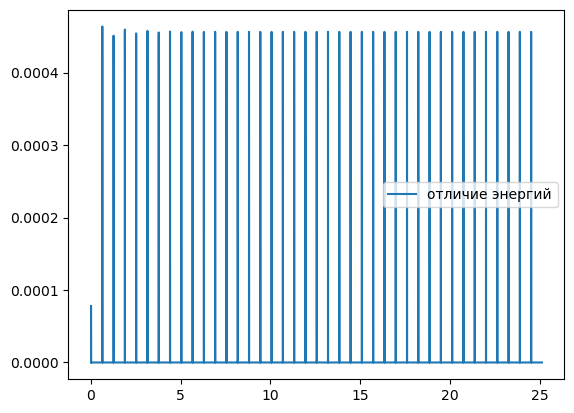

In [13]:
def sign(X):
    if X > 0:
        return 1
    elif X < 0:
        return -1
    return 0

def predictor_corrector_harmonic_oscillator(w, u0, T, dt):
    E0 = w**2*u0[0]**2/2+u0[1]**2/2
    a = np.array([[0,1],[-w**2,0]])
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = a.shape[0]
    y = np.empty((num_steps+1, ndim))
    y[0] = u0
    
    for k in range(num_steps):
        y[k+1] = y[k] + a@y[k]*dt # с помощью явного Эйлера предиктим
        
        if y[k, 1] != 0:  # корректируем с помощью первого интеграла
            y[k + 1, 1] = sign(y[k + 1, 1])*\
                (abs(2*E0 - w**2*y[k+1,0]**2)**0.5)
            
    plt.title(f'predict-correct {dt}')
    #plt.scatter(sample, np.zeros(200) - 0.02, alpha=0.2, label='sample')  # label - описание в легенде
    plt.plot(tt, y[:,0] , color='blue', 
             label='отклонение от положения равновесия')  # color - цвет графика
    ym = mat_exp_solve(a, [1, 0], tt)
    plt.plot(tt,ym[:,0],color = 'orange', alpha = 0.5, label = 'true',lw = 4)
    E = w**2*y[:,0]**2/2+y[:,1]**2/2
    plt.legend()  # добавляет легенду
    plt.show()
    plt.plot(tt,E-E0,label = 'отличие энергий')
    plt.legend()  # добавляет легенду
    plt.show()

T = 20*2*np.pi/w


tau = 5e-2
predictor_corrector_harmonic_oscillator(w = 5,u0 = [1,0],T = T,dt = tau)

tau = 5e-3
predictor_corrector_harmonic_oscillator(w = 5,u0 = [1,0],T = T,dt = tau)

tau = 5e-4
predictor_corrector_harmonic_oscillator(w = 5,u0 = [1,0],T = T,dt = tau)

# Задание 7. Методы предиктора и корректора для ОДУ.

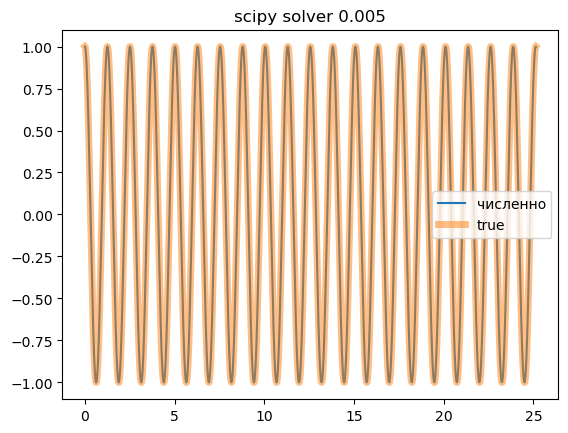

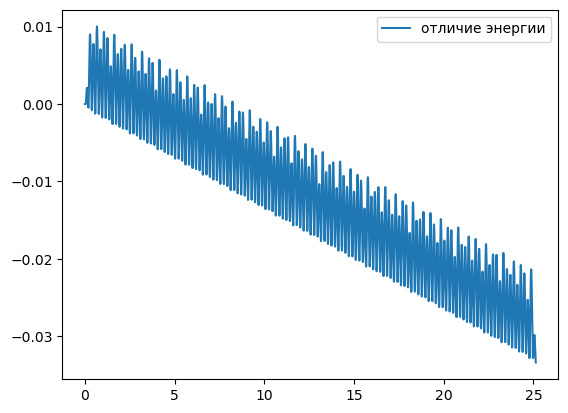

In [14]:
from scipy.integrate import solve_ivp


def right_side(x,y):
    w = 5
    a = np.array([[0,1],[-w**2,0]])
    return a@y

def scipy_solver(func, u0, T,dt):
    w = 5
    sol = solve_ivp(right_side, (0,T), u0,t_eval=np.arange(0, T, dt))
    E0 = w**2*u0[0]**2/2+u0[1]**2/2
    E = w**2*sol.y[0,:]**2/2+sol.y[1,:]**2/2
    ym = mat_exp_solve(np.array([[0,1],[-w**2,0]]), [1, 0], sol.t)
    plt.title(f'scipy solver {tau}')
    plt.plot(sol.t,sol.y[0,:],label = 'численно')
    plt.plot(sol.t, ym[:,0],alpha = 0.5 ,lw = 5,label = 'true')
    plt.legend()
    plt.show()
    plt.plot(sol.t,E-E0, label = 'отличие энергии')
    plt.legend()
    plt.show()

w = 5
T = 20*2*np.pi/w
tau = 5e-3
scipy_solver(right_side, [1,0],T,tau) 

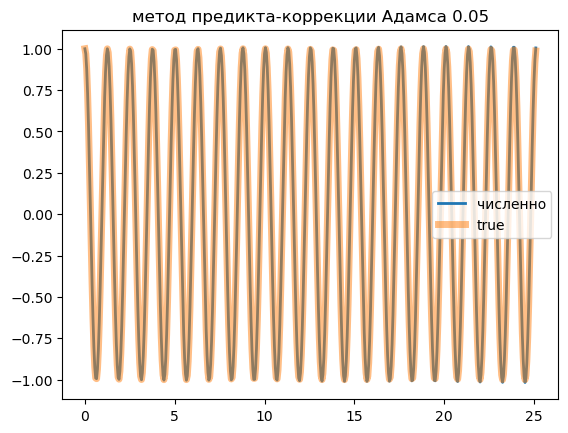

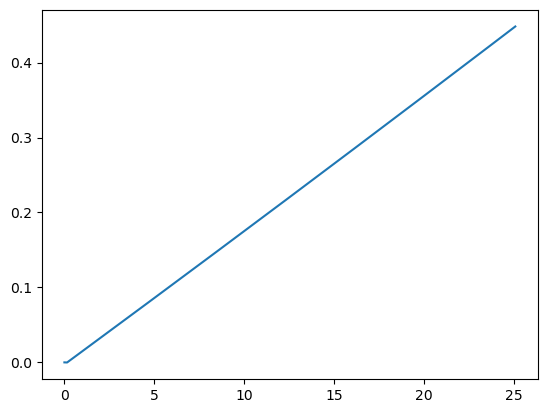

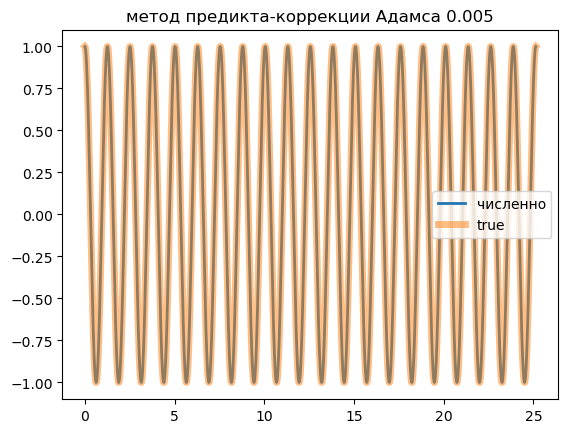

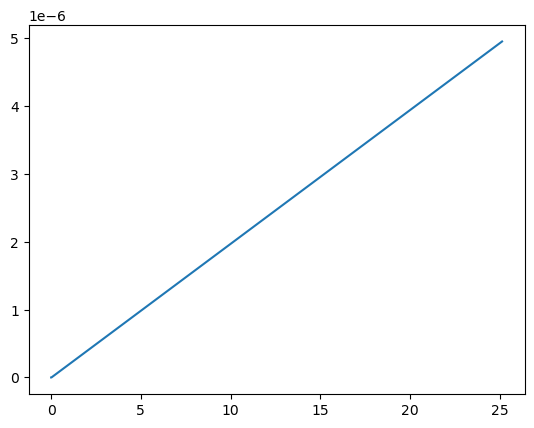

In [15]:
def right_side(x,y,params):
    w = params
    a = np.array([[0,1],[-w**2,0]])
    return a@y

def adams_prediction_correction(func,u0,T,dt,params = [],real_solution = True, plot_solution = True):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = len(u0)
    y = np.empty((num_steps+1, ndim))
    y[0,:] = u0
    #Первые четыре точки методом Рунге-Кутты четвертого порядка
    for k in range(3):
        f1 = func(tt[k],y[k,:],*params)
        f2 = func(tt[k]+1/2*dt,y[k,:]+1/2*dt*f1,*params)
        f3 = func(tt[k]+1/2*dt,y[k,:]+1/2*dt*f2,*params)
        f4 = func(tt[k]+dt,y[k,:]+dt*f3,*params)
        y[k+1,:] = y[k,:]+dt/6*(f1+2*f2+2*f3+f4)
    # Метод Адамса
    for k in range(3,num_steps):
        
        y[k+1] = y[k]+\
            dt/24*(-9*func(tt[k-3],y[k-3,:],*params)+37*func(tt[k-2],y[k-2,:],*params)-\
                   59*func(tt[k-1],y[k-1,:],*params)+55*func(tt[k],y[k,:],*params)) #predict
        y[k+1] = y[k]+dt/24*(func(tt[k-2],y[k-2,:],*params)-5*func(tt[k-1],y[k-1,:],*params)+\
                    19*func(tt[k],y[k,:],*params)+9*func(tt[k+1],y[k+1,:],*params)) #correct
    
    if plot_solution:
        plt.title(f'метод предикта-коррекции Адамса {dt}')    
        plt.plot(tt, y[:,0],alpha = 1 ,lw = 2,label = 'численно')    
        
    if real_solution:
        coeff = -a[1,0]
        E0 = coeff*u0[0]**2/2+u0[1]**2/2
        E = coeff*y[:,0]**2/2+y[:,1]**2/2
        ym = mat_exp_solve(a, u0, tt)
        plt.plot(tt, ym[:,0],alpha = 0.5 ,lw = 5,label = 'true')
    
    if plot_solution:
        plt.legend()
        plt.show()
    if real_solution:
        plt.plot(tt,E-E0, label = 'отличие энергии')
        plt.show()
    return tt, y

tau = 5e-2
w = 5
T = 20*2*np.pi/w
a = np.array([[0,1],[-w**2,0]])

y= adams_prediction_correction(right_side, [1,0],T,tau,params = [w])

tau = 5e-3
w = 5
T = 20*2*np.pi/w
a = np.array([[0,1],[-w**2,0]])
tt,y = adams_prediction_correction(right_side, [1,0],T,tau,params = [w])

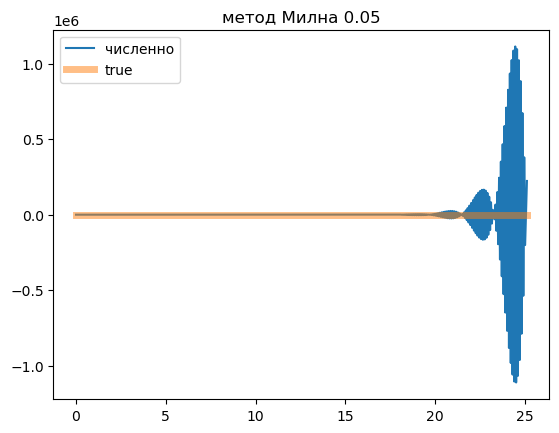

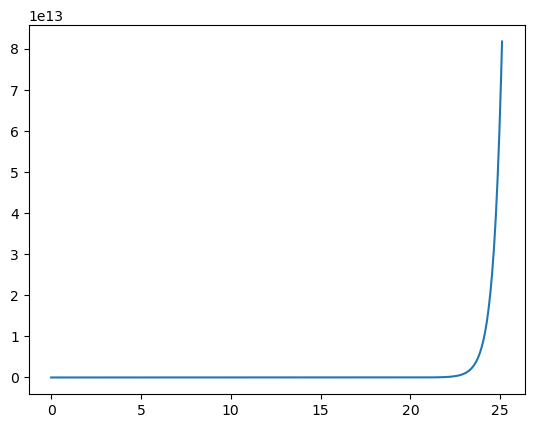

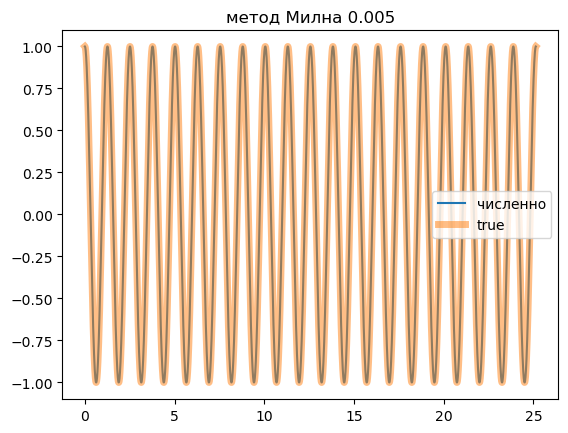

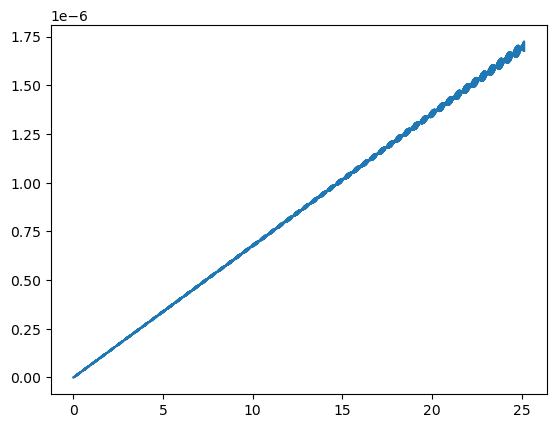

In [16]:
def milnes_method(a,u0,T,dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = a.shape[0]
    y = np.empty((num_steps+1, ndim))
    y[0] = u0
    #Первые четыре точки методом Рунге-Кутты четвертого порядка
    for k in range(3):
        f1 = a@y[k]
        f2 = a@(y[k]+1/2*dt*f1)
        f3 = a@(y[k]+1/2*dt*f2)
        f4 = a@(y[k]+dt*f3)
        y[k+1] = y[k]+dt/6*(f1+2*f2+2*f3+f4)
    # Метод Милна
    for k in range(3,num_steps):
        y[k+1] = y[k-3]+4*dt/3*(2*a@y[k-2]-a@y[k-1]+2*a@y[k]) #predict
        y[k+1] = y[k-1]+dt/3*(a@y[k-1]+4*a@y[k]+a@y[k+1]) #correct
    
    E0 = w**2*u0[0]**2/2+u0[1]**2/2
    E = w**2*y[:,0]**2/2+y[:,1]**2/2
    plt.title(f'метод Милна {tau}')
    plt.plot(tt,y[:,0],label = 'численно')
    ym = mat_exp_solve(a, [1, 0], tt)
    plt.plot(tt, ym[:,0],alpha = 0.5 ,lw = 5,label = 'true')
    plt.legend()
    plt.show()
    plt.plot(tt,E-E0, label = 'отличие энергии')
    plt.show()

tau = 5e-2
w = 5
T = 20*2*np.pi/w
a = np.array([[0,1],[-w**2,0]])
milnes_method(a, [1,0],T,tau)

tau = 5e-3
w = 5
T = 20*2*np.pi/w
a = np.array([[0,1],[-w**2,0]])
milnes_method(a, [1,0],T,tau)

# Задание 8. Нелинейное уравнение Пуассона.

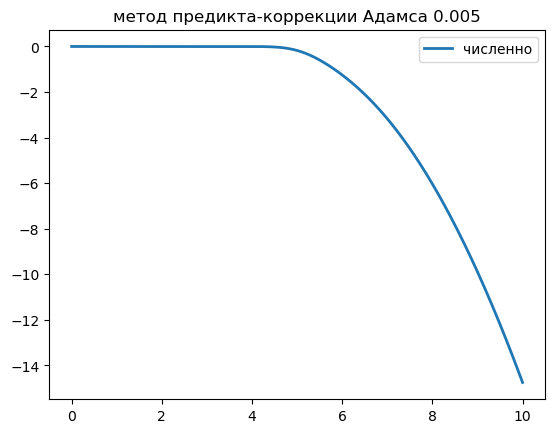

In [17]:
# решаем численно методом адамса
def n(x):
    return 1 + np.exp(-3*(x-5)**2)

def right_side(x,y,params = []):
    y1,y2 = y
    f1 = y2
    f2 = np.exp(y1) - n(x)
    f = np.array([f1,f2])
    return f
    
tau = 0.005
T = 10
tt, y = adams_prediction_correction(right_side, [0,0],T,tau,real_solution = False)



In [18]:
# import sympy as sp

# x = sp.symbols('x')
# y_expr = 0
# n_func = 1 + sp.exp(-3*(x-5)**2)
# N = 25
# coeff = np.zeros(N + 1)
# f = sp.exp(y_expr)
# factorial_k = 1
# # Вычисляем коэффициенты ряда
# for k in range(2, N + 1):
#     factorial_k *= k
#     print(k)
#     n_func = sp.diff(n_func,x)
#     f = sp.diff(f,x)
#     coeff[k] = sp.N((f.subs(x, 0) - n_func.subs(x, 0))/factorial_k)
#     y_expr = sp.expand(y_expr + coeff[k] * x**k)
# # display(y_expr)    
# lam_y = sp.lambdify(x, y_expr, 'numpy')

In [19]:
# display(y_expr)

In [20]:
# X = np.linspace(0,10,100)
# plt.plot(X,lam_y(X),label = 'ряд тейлора')
# tau = 5e-3
# w = 5
# T = 20*2*np.pi/w
# a = np.array([[0,1],[-w**2,0]])

# tau = 0.005
# T = 10
# sol = adams_prediction_correction(right_side, [0,0],T,tau,real_solution = False)

# Задание 9. Построение интерфейса и фазовые портреты.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from ipywidgets import widgets
from time import sleep


def n(x):
    return 1 + np.exp(-3*(x-5)**2)

def right_side(x,y,params = []):
    y1,y2 = y
    f1 = y2
    f2 = np.exp(y1) - n(x)
    f = np.array([f1,f2])
    return f

def main(*args):
    tmax = w_tmax.value
    steps = w_n.value
    q = w_q.value
    r = w_r.value
    dt = tmax/steps
    
    u0 = [q, r] # начальные условия
    t,y = adams_prediction_correction(right_side,
                                u0 = u0,T = tmax,dt = dt,real_solution = False,
                                plot_solution = False)
    with out2:
        clear_output(wait=True)
        fig = plt.figure(figsize=(12, 7))
        ax1 = fig.add_subplot(311)
        ax1.plot(y[:,0], y[:,1], 'k-', lw=2)
        ax2 = fig.add_subplot(312)
        ax2.plot(t, y[:,0], 'k-', lw=2)
        ax3 = fig.add_subplot(313)
        ax3.plot(t, y[:,1], 'k-', lw=2)
        plt.show()
        
        
out1 = widgets.Output(layout={'width': '45%'})
out2 = widgets.Output(layout={'width': '55%'})
w_tmax = widgets.FloatSlider(description='tmax ', min=10, max=100, step=1, value=10)
w_n = widgets.IntSlider(description='Число шагов ', min=10, max=10000, step=1, value=10000)
w_q = widgets.FloatSlider(description='q ', min=-100, max=100, step=0.1, value=0)
w_r = widgets.FloatSlider(description='r ', min=-10, max=10, step=0.00001, value=0.006520, readout_format='.5f')
w_button = widgets.Button(description='Запустить', button_style='primary')
w_button.on_click(main)

display(widgets.HBox([out1, out2]))
with out1:
    display(w_tmax,
            w_n,
            w_q,
            w_r,
            w_button)

In [22]:
def run(*args):
    delay = w_delay.value
    tmax = w_tmax.value
    steps = w_n.value
    q = w_q.value
    r = w_r.value
    dt = tmax/steps
    u0 = [q, r] # начальные условия
    tt, y = adams_prediction_correction(right_side,
                                u0 = u0,T = tmax,dt = dt,real_solution = False, plot_solution = False)
    with out4:
        for i in range(0, len(y), len(y)//200):
            clear_output(wait=True)
            plt.figure(figsize=(7, 7))
            plt.title('Фазовый портрет')
            plt.xlim((np.min(y[:, 0])-0.1, np.max(y[:, 0]+0.1)))
            plt.ylim((np.min(y[:, 1])-0.1, np.max(y[:, 1]+0.1)))
            plt.plot(y[:i, 0], y[:i, 1], color='black', lw=2)
            plt.xlabel('x')
            plt.ylabel('y')
            plt.show()
            sleep(delay)


out3 = widgets.Output(layout={'width': '50%'})
out4 = widgets.Output(layout={'width': '50%'})
w_delay = widgets.FloatSlider(description='Задержка ', min=0, max=1, step=0.01, value=0.01)
w_button = widgets.Button(description='Запустить', button_style='primary')
w_button.on_click(run)
display(widgets.HBox([out3, out4]))
with out3:
    display(w_delay,
            w_button)

# Задание 10. Построение интерфейса и фазовые портреты-2.

In [23]:
def right_side(x,y,w,beta):
    y1,y2 = y
    f1 = y2
    f2 = -w**2*y1-beta*y1**3
    f = np.array([f1,f2])
    return f

def main(*args):
    tmax = w_tmax.value
    steps = w_n.value
    omega = w_omega.value
    beta = w_beta.value
    q = w_q.value
    r = w_r.value
    dt = tmax/steps
    
    u0 = [q, r] # начальные условия
    t,y = adams_prediction_correction(right_side,
                                u0 = u0,T = tmax,dt = dt,params = [omega,beta],
                                real_solution = False,
                                plot_solution = False)
    with out2:
        clear_output(wait=True)
        fig = plt.figure(figsize=(7, 10))
        ax1 = fig.add_subplot(311)
        ax1.plot(y[:,0], y[:,1], 'k-', lw=2)
        ax2 = fig.add_subplot(312)
        ax2.plot(t, y[:,0], 'k-', lw=2)
        ax3 = fig.add_subplot(313)
        ax3.plot(t, y[:,1], 'k-', lw=2)
        plt.show()
        
        
out1 = widgets.Output(layout={'width': '45%'})
out2 = widgets.Output(layout={'width': '55%'})
w_tmax = widgets.FloatSlider(description='tmax ', min=0.1, max=100, step=0.1, value=10)
w_n = widgets.IntSlider(description='Число шагов ', min=10, max=10000, step=1, value=10000)
w_omega = widgets.FloatSlider(description='Частота', min=0, max=20, step=0.1, value=1)
w_beta = widgets.FloatSlider(description='Нелинейность', min=-2, max=100, step=0.1, value=0.)
w_q = widgets.FloatSlider(description='q ', min=-100, max=100, step=0.1, value=0)
w_r = widgets.FloatSlider(description='r ', min=-10, max=10, step=0.1, value=1)
w_button = widgets.Button(description='Запустить', button_style='primary')
w_button.on_click(main)

display(widgets.HBox([out1, out2]))
with out1:
    display(w_tmax,
            w_n,
            w_omega,
            w_beta,
            w_q,
            w_r,
            w_button)

In [24]:
def run(*args):
    delay = w_delay.value
    tmax = w_tmax.value
    steps = w_n.value
    omega = w_omega.value
    beta = w_beta.value
    q = w_q.value
    r = w_r.value
    dt = tmax/steps
    u0 = [q, r] # начальные условия
    tt, y = adams_prediction_correction(right_side,
                                u0 = u0,T = tmax,dt = dt,params = [omega,beta],
                                real_solution = False, plot_solution = False)
    with out4:
        for i in range(0, len(y), len(y)//200):
            clear_output(wait=True)
            plt.figure(figsize=(7, 7))
            plt.title('Фазовый портрет')
            plt.xlim((np.min(y[:, 0])-0.1, np.max(y[:, 0]+0.1)))
            plt.ylim((np.min(y[:, 1])-0.1, np.max(y[:, 1]+0.1)))
            plt.plot(y[:i, 0], y[:i, 1], color='black', lw=2)
            plt.xlabel('x')
            plt.ylabel('y')
            plt.show()
            sleep(delay)


out3 = widgets.Output(layout={'width': '50%'})
out4 = widgets.Output(layout={'width': '50%'})
w_delay = widgets.FloatSlider(description='Задержка ', min=0, max=1, step=0.01, value=0.01)
w_button = widgets.Button(description='Запустить', button_style='primary')
w_button.on_click(run)
display(widgets.HBox([out3, out4]))
with out3:
    display(w_delay,
            w_button)

# Краевые задачи

# Задание 1.

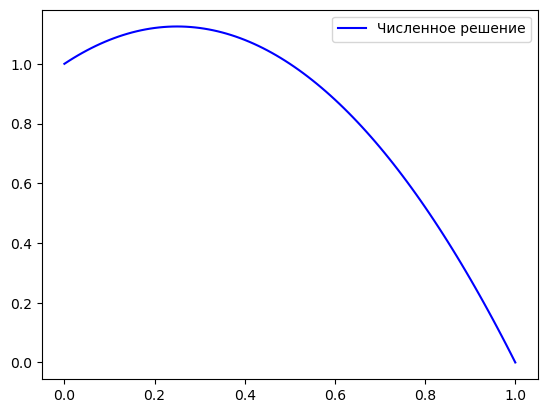

In [25]:
def homogeneous(x,y,params = []):
    y1,y2 = y
    f1 = y2
    f2 = -(1-4*x)*y2-8*y1
    f = np.array([f1,f2])
    return f

def right_side(x,y,params = []):
    y1,y2 = y
    f1 = y2
    f2 = -(1-4*x)*y2-8*y1 + 5
    f = np.array([f1,f2])
    return f

# T должно делиться на dt нацело
T = 1
dt = 1e-2

tt, y1 = adams_prediction_correction(homogeneous,
                                u0 = [1,0],T = T,dt = dt,
                                real_solution = False, plot_solution = False)

tt, y2 = adams_prediction_correction(homogeneous,
                                u0 = [0,1],T = T,dt = dt,
                                real_solution = False, plot_solution = False)

tt, y0 =  adams_prediction_correction(right_side,
                                u0 = [0,0],T = T,dt = dt,
                                real_solution = False, plot_solution = False)
alpha = -y0[-1,0]/(y1[-1,0]+y2[-1,0])
plt.plot(tt, y0[:,0]+alpha*(y1[:,0]+y2[:,0]),color = 'blue', label = 'Численное решение')
plt.legend()

# Задание 2.

ДУ можно переписать в виде:

$\begin{cases}
    y^{\prime} = v\\
    v^{\prime} = -y+x\cos{x}
\end{cases}$

Будем использовать прогоночное соотношение $y^{\prime} = \alpha y + \beta$, потому что решение для $\alpha$ будет иметь сингулярность, если использовать соотношение $y = \alpha y^{\prime} + \beta$

Проводя расчеты как на семинаре, получаем три задачи Коши

$\alpha^{\prime} + \alpha^2 + 1 = 0,\ \alpha(0) = 3$

$\beta^{\prime} + \alpha \beta - x\cos{x} = 0,\ \beta(0) = 2$

$v^{\prime} + \alpha v + \beta - x\cos{x} = 0,\ v(\pi/2) = \dfrac{2-5\beta(\pi/2)}{1+5\alpha(\pi/2)} $

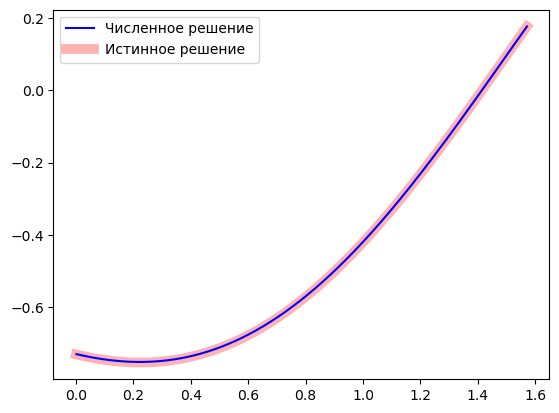

Значение в pi/2: 0.1758695699135573
Значение производной в pi/2: 1.1206521504322136


In [26]:
# T должно делиться на dt нацело
def runge_kutta_4order(func, u0, T0, T, dt, alpha, beta):
    num_steps = int((T-T0)/dt)
    tt = T0 + np.arange(num_steps + 1)*dt
    ndim = len(u0)
    y = np.empty((num_steps + 1, ndim))
    y[0,:] = u0
    for k in range(num_steps):
        f1 = func(tt[k], y[k,:], alpha[k,:], beta[k,:])
        f2 = func(tt[k] + 1/2*dt, y[k,:] + 1/2*dt*f1, alpha[k,:], beta[k,:])
        f3 = func(tt[k] + 1/2*dt, y[k,:] + 1/2*dt*f2, alpha[k,:], beta[k,:])
        f4 = func(tt[k] + dt, y[k,:] + dt*f3, alpha[k,:], beta[k,:])
        y[k+1,:] = y[k,:] + dt/6*(f1 + 2*f2 + 2*f3 + f4)
        
    return tt,y

def real_solution(x):
    return -0.73*np.cos(x) - 0.441 * np.sin(x) + 1/4 * (x**2 * np.sin(x) + x * np.cos(x))

def alpha_rs(x,y,alpha,beta):
    return -y**2 - 1

def beta_rs(x,y,alpha,beta):
    return -alpha * y + x*np.cos(x)

def vel_rs(x,y,alpha,beta):
    return alpha*y + beta

T = np.pi/2
n = 1000
dt = T/n
ndim = 1

alpha = np.zeros((n + 1, ndim))
beta = np.zeros((n + 1, ndim))

tt, alpha = runge_kutta_4order(alpha_rs,
                                u0 = [3], T0 = 0, T = T, dt = dt, alpha = alpha, beta = beta)
    

tt, beta = runge_kutta_4order(beta_rs,
                                u0 = [2], T0 = 0, T = T, dt = dt, alpha = alpha, beta = beta)


alpha_rev = alpha[::-1].copy()
beta_rev = beta[::-1].copy()

alpha_end = alpha[-1][0]
beta_end = beta[-1][0]
v0 = (2 - beta_end) / (alpha_end + 5)

tt, v = runge_kutta_4order(vel_rs,
                                u0 = [v0],
                               T0 = T, T = 0, dt = -dt, alpha = alpha_rev, beta = beta_rev)

plt.plot(tt[::-1], v[::-1], color = 'blue', label = 'Численное решение', zorder = 2)
T = np.linspace(0, np.pi/2, 100)
plt.plot(T, real_solution(T), color = 'red', lw = 7, alpha = 0.3, label = 'Истинное решение', zorder = 1)
plt.legend()
plt.show()
print(f'Значение в pi/2: {v[0,0]}')
print(f'Значение производной в pi/2: {alpha[-1,0]*v[0,0] + beta[-1,0]}')

# Задание 3.

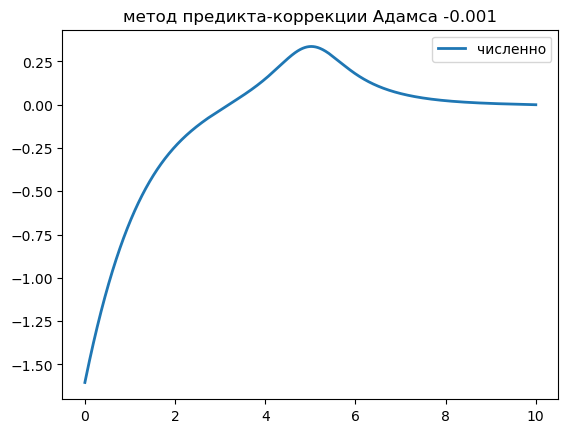

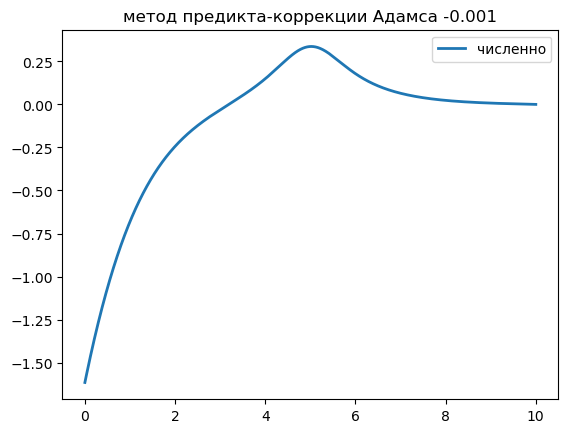

-0.0065484223031625766


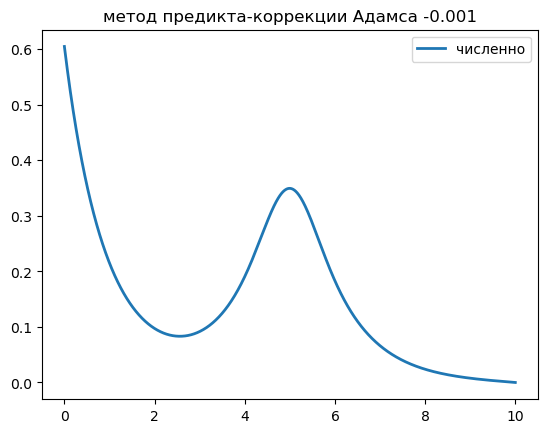

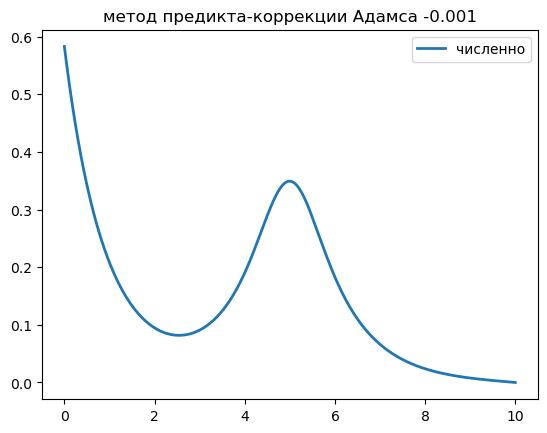

-0.006520560787335346


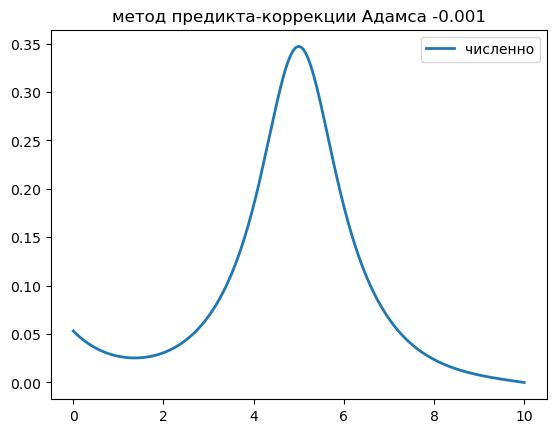

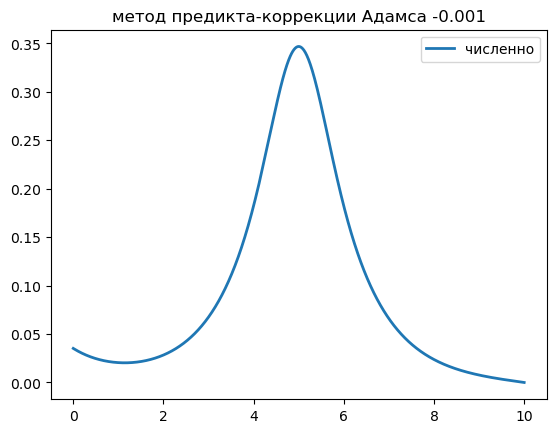

-0.0065176071056114605


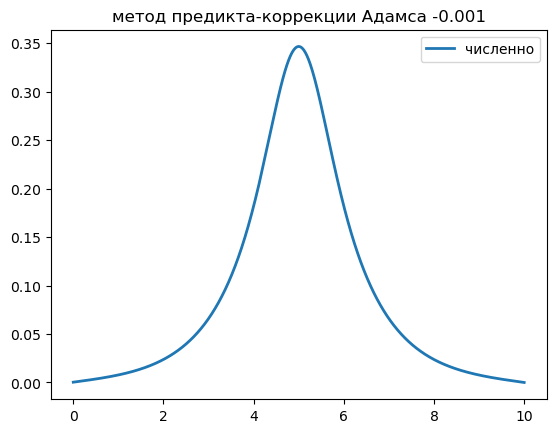

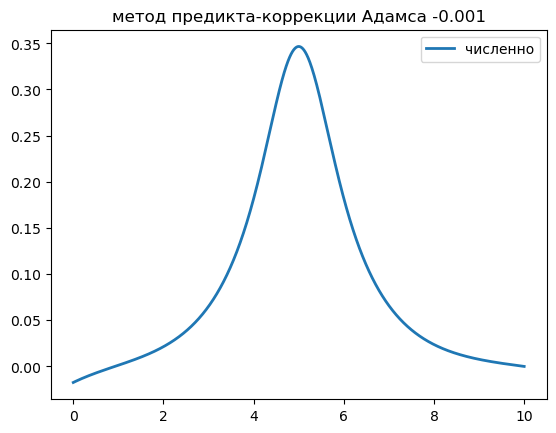

-0.006517589772256944


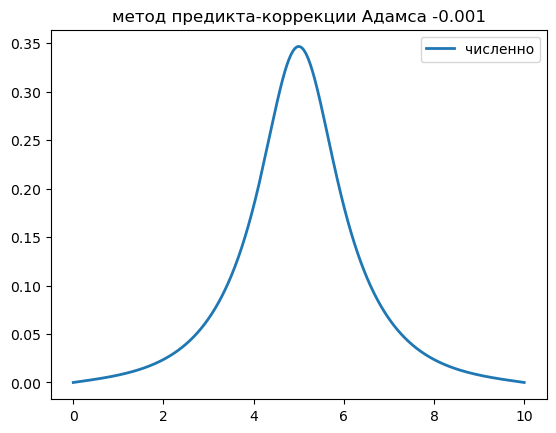

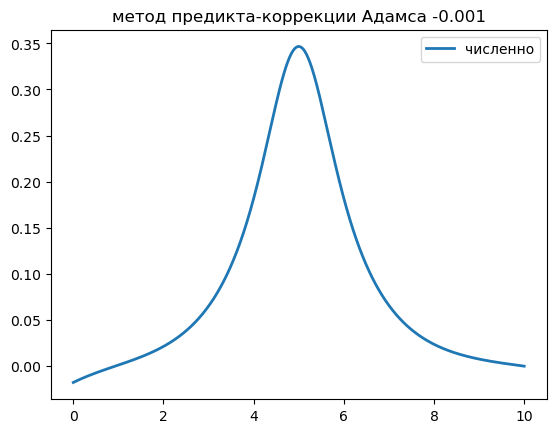

-0.006517589822094011


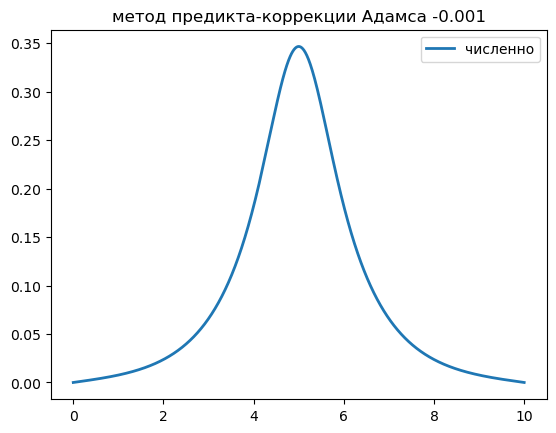

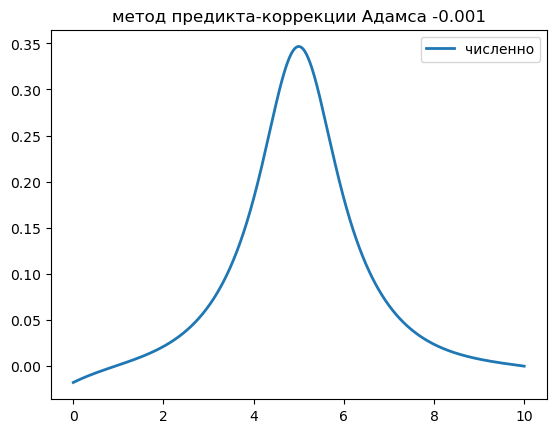

-0.0065175898219482385


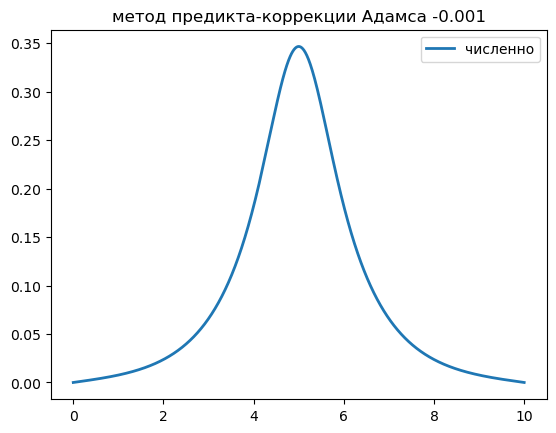

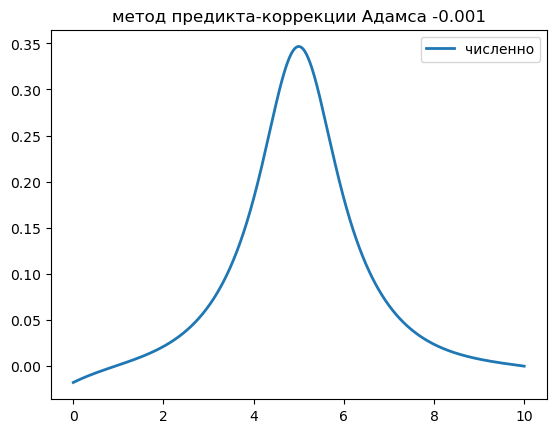

-0.006517589821948635
Количество итераций для достижения точности 1.0e-10: 7
Значение в точке x = 0: -7.020e-12
Параметр beta: -0.0065175898


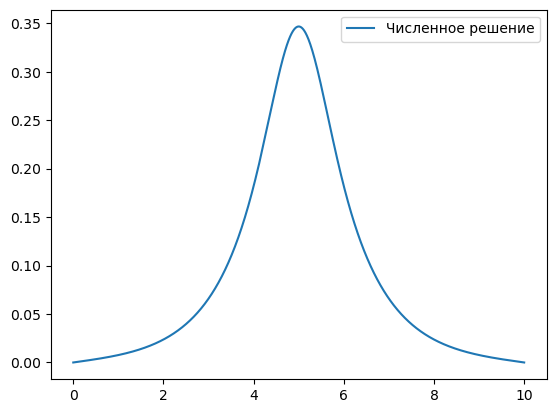

In [27]:
def adams_prediction_correction(func,u0, T0, T,dt,params = [],real_solution = True, plot_solution = True):
    num_steps = int(round((T-T0)/dt))
    tt = T0 + np.arange(num_steps+1)*dt
    ndim = len(u0)
    y = np.empty((num_steps+1, ndim))
    y[0,:] = u0
    #Первые четыре точки методом Рунге-Кутты четвертого порядка
    for k in range(3):
        f1 = func(tt[k],y[k,:],params)
        f2 = func(tt[k]+1/2*dt,y[k,:]+1/2*dt*f1,params)
        f3 = func(tt[k]+1/2*dt,y[k,:]+1/2*dt*f2,params)
        f4 = func(tt[k]+dt,y[k,:]+dt*f3,params)
        y[k+1,:] = y[k,:]+dt/6*(f1+2*f2+2*f3+f4)
    # Метод Адамса
    for k in range(3,num_steps):
        
        y[k+1] = y[k]+\
            dt/24*(-9*func(tt[k-3],y[k-3,:],params)+37*func(tt[k-2],y[k-2,:],params)-\
                   59*func(tt[k-1],y[k-1,:],params)+55*func(tt[k],y[k,:],params)) #predict
        y[k+1] = y[k]+dt/24*(func(tt[k-2],y[k-2,:],params)-5*func(tt[k-1],y[k-1,:],params)+\
                    19*func(tt[k],y[k,:],params)+9*func(tt[k+1],y[k+1,:],params)) #correct
    
    if plot_solution:
        plt.title(f'метод предикта-коррекции Адамса {dt}')    
        plt.plot(tt, y[:,0],alpha = 1 ,lw = 2,label = 'численно')    
        
    if real_solution:
        coeff = -a[1,0]
        E0 = coeff*u0[0]**2/2+u0[1]**2/2
        E = coeff*y[:,0]**2/2+y[:,1]**2/2
        ym = mat_exp_solve(a, u0, tt)
        plt.plot(tt, ym[:,0],alpha = 0.5 ,lw = 5,label = 'true')
    
    if plot_solution:
        plt.legend()
        plt.show()
    if real_solution:
        plt.plot(tt,E-E0, label = 'отличие энергии')
        plt.show()
    return tt, y


def n(x):
    return 1 + np.exp(-3*(x-5)**2)

def right_side(x,y,params = []):
    y1,y2 = y
    f1 = y2
    f2 = np.exp(y1) - n(x)
    f = np.array([f1,f2])
    return f

init_guess = -0.0064
beta = init_guess
T0 = 10
T = 0
N = 10000
dt = (T-T0)/N
eps = 1e-10
h = 1e-6
sol_bound = 1
k = 0

while abs(sol_bound)>eps:
    k+=1
    tt, sol =  adams_prediction_correction(right_side,
                                u0 = [0,beta],T0 = T0, T = T,dt = dt,
                                real_solution = False, plot_solution = True)
    tt, sol_deriv = adams_prediction_correction(right_side,
                                u0 = [0,beta + h],T0 = T0, T = T,dt = dt,
                                real_solution = False, plot_solution = True)
    sol_bound = sol[-1,0]
    beta = beta - h*sol_bound/(sol_deriv[-1,0] - sol_bound)
    print(beta)

plt.plot(tt, sol[:,0], label = f'Численное решение')
plt.legend()
print(f'Количество итераций для достижения точности {eps:.1e}: {k}')
print(f'Значение в точке x = 0: {sol[-1,0]:.3e}')
print(f'Параметр beta: {beta:.10f}')

# Задание 4.

$\frac{\partial f(x,y,y^{\prime})}{\partial y} = \exp{(y)}$, $\frac{\partial f(x,y,y^{\prime})}{y^{\prime}} = 0$

Количество итераций для достижения точности 1.0e-10: 4


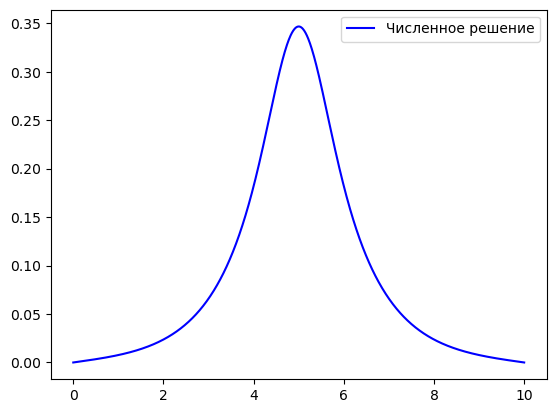

In [28]:
def n(x):
    return 1 + np.exp(-3*(x-5)**2)

def homogeneous(x, y, params):
    y0, d1y0, d2y0, T0, dt = params
    k = int(round((x - T0) / dt))
    y0_val = y0[k]
    y1, y2 = y
    f1 = y2
    f2 = np.exp(y0_val) * y1
    return np.array([f1, f2])

def right_side(x, y, params):
    y0, d1y0, d2y0, T0, dt = params
    k = int(round((x - T0) / dt))
    y0_val = y0[k]
    d2y0_val = d2y0[k]
    y1, y2 = y
    f1 = y2
    f2 = np.exp(y0_val) * y1 + (np.exp(y0_val) - n(x) - d2y0_val)
    return np.array([f1, f2])

def lin_solver(homogeneous, right_side, T0, T, dt, params):
#     tt, y1 = adams_prediction_correction(homogeneous,
#                                 u0 = [1,0],T0 = T0, T = T,dt = dt,
#                                 real_solution = False, plot_solution = False)

    tt, y2 = adams_prediction_correction(homogeneous,
                                u0 = [0,1], T0 = T0, T = T,dt = dt, params = params,
                                real_solution = False, plot_solution = False)

    tt, y_p =  adams_prediction_correction(right_side,
                                u0 = [0,0], T0 = T0, T = T, dt = dt, params = params,
                                real_solution = False, plot_solution = False)
    beta = -y_p[-1,0]/y2[-1,0] 
    y_comb = y_p + beta * y2
    
    f_all = np.array([
        right_side(xi, yi, params) for xi, yi in zip(tt, y_comb)
    ])
    d2y = f_all[:,1]

    y_full = np.zeros((len(tt), 3))
    y_full[:,:2] = y_comb
    y_full[:,2] = d2y
    return tt, y_full

def newtons_method(T0, T, dt, eps, max_iter = 100):
    N = int((T-T0)/dt)
    k = 0
    y0 = np.zeros(N + 1)
    d1y0 = np.zeros(N + 1)
    d2y0 = np.zeros(N + 1)
    tt, v = lin_solver(homogeneous, right_side, T0, T, dt, params = [y0, d1y0, d2y0, T0, dt])
    while np.max(np.abs(v)) > eps:
        k += 1
        y0 += v[:, 0]
        d1y0 += v[:, 1]
        d2y0 += v[:, 2]
        tt, v = lin_solver(homogeneous, right_side, T0, T, dt, params = [y0, d1y0, d2y0, T0, dt])
    plt.plot(tt, y0 + v[:, 0], color = 'blue', label = 'Численное решение')
    plt.legend()
    print(f'Количество итераций для достижения точности {eps:.1e}: {k}')

N = 1000
dt = 10/N
newtons_method(T0 = 0, T = 10, dt = dt, eps = 1e-10, max_iter = 100)

# Задание 5.

В качестве нулевого приближения возьмем линейную функцию, соединяющую краевые точки:  $y_0 = \frac{15-7t}{8}$. Необходимо найти поправку $v$. Разложим ее в ряд  по полиномам $e_k = (t-1)(t-2)t^k$, k = 0,1: $v = a_0 e_0 + a_1 e_1$.

Линейное уравнение для поправки имеет вид: $v^{\prime\prime} = 24t\left(\frac{15-7t}{8}\right)v + 12t\left(\frac{15-7t}{8}\right)^2$.

Метод Галеркина: $\sum\limits_{k = 0}^{1}a_k \int\limits_1^2(2t^k+2k(2t-3)-3t(15-7t)(t-1)(t-2)t^k)(t-1)(t-2)t^jdt = \int\limits_1^212t\left(\frac{15-7t}{8}\right)^2(t-1)(t-2)t^jdt$, $j = 0,1$. 

Считая интегралы аналитически, находим систему уравнений на $a_k$. Решая систему, находим, что:

$y = \dfrac{2948727 - 4616801 x + 2546901 x^2 - 481635 x^3}{397192}$

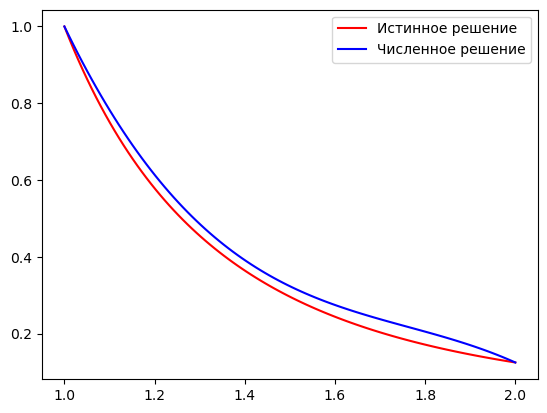

In [29]:
xx = np.linspace(1,2,100)
plt.plot(xx, 1/xx**3, color = 'red', label = 'Истинное решение')
plt.plot(xx, (2948727 - 4616801*xx + 2546901*xx**2 - 481635*xx**3)/397192,
         color = 'blue', label = 'Численное решение')
plt.legend()
plt.show()